# Trend Predicting

* **Problem**: Trend Predicting based on user behaviors
* **Descript
ion**: 
  * Create online preference index for each major product group
  * Predict demand trends and draw insights by product group
  * Suggest new service from 1), 2)
* **Dataset**: ? non-numeric column, and ? numeric columns
  * ? : ?
  * Non-numeric columns:
    * 16 non-numeric columns : ?
  * Numeric columns: 
    * 104 numeric columns : ?
 


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
import os

# Load Data

* 'custom.csv'
* 'search1.csv'
* 'search2.csv'
* 'master.csv'
* 'session.csv'
* 'product.csv'


In [18]:
path = Path().resolve().parents[0]
custom = pd.read_csv(os.path.join(path, 'Dataset', 'Custom.csv'))
search1 = pd.read_csv(os.path.join(path, 'Dataset', 'Search1.csv'))
search2 = pd.read_csv(os.path.join(path, 'Dataset', 'Search2.csv'))
master = pd.read_csv(os.path.join(path, 'Dataset', 'Master.csv'))
session = pd.read_csv(os.path.join(path, 'Dataset', 'Session.csv'))

In [23]:
print('custom shape : ', custom.shape)
print('search1 shape : ', search1.shape)
print('search2 shape : ', search2.shape)
print('master shape : ', master.shape)
print('session shape : ', session.shape)

custom shape :  (671679, 3)
search1 shape :  (2884943, 4)
search2 shape :  (8051172, 3)
master shape :  (847652, 5)
session shape :  (2712907, 9)


In [10]:
custom.head()

,CLNT_ID,CLNT_GENDER,CLNT_AGE
0,4830726,F,30
1,4830874,F,40
2,4830975,F,30
3,4831275,F,30
4,4825325,F,30


In [9]:
search1.head()

,CLNT_ID,SESS_ID,KWD_NM,SEARCH_CNT
0,5607714,7112876,빌리프 아이크림,6
1,5607714,4090791,프리메라 마스크팩,3
2,5607714,4090791,여성청결제,1
3,5612428,1876482,명품가방,1
4,5612428,658123,콩순이 아이스크림,1


In [17]:
search2.head()

,SESS_DT,KWD_NM,SEARCH_CNT
0,20180407,닥스원피스,8
1,20180407,닥터지 브라이트닝,1
2,20180407,달팡 인트랄,2
3,20180407,대상트,1
4,20180407,더블유닷,6


In [21]:
master.head()

,PD_C,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM
0,64382,언더아머 남성 UA HG 아머 모크 LS 1289559-001 - 블랙 / MD[95],스포츠패션,남성일반스포츠의류,남성스포츠티셔츠
1,62282,여자 플라워덧신 2족선물세트 17403-2set,속옷/양말/홈웨어,여성양말류,여성일반양말
2,61729,88A2933253배트맨스웨트티 - 블랙 / 130,유아동의류,유아의류상의,영유아티셔츠/탑
3,61537,"닥터마틴 아드리안 블랙, 체리레드 - 02_체리레드 / 250mm(6)",패션잡화,남성화,남성부츠
4,58820,여성 그레이 스트라이프 퍼프 소매 블라우스 (128865YQ33) - 회색(앤틱실버...,남성의류,남성의류상의,남성남방셔츠


In [24]:
session.head()

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM
0,5873599,8641867,9,20180509,82.0,"1,890",mobile,Daejeon,Daejeon
1,5873599,6616320,21,20180611,105.0,"1,604",mobile,Busan,Busan
2,5873599,5886172,40,20180624,41.0,632,mobile,Daejeon,Daejeon
3,5873884,1050889,15,20180913,160.0,"1,035",mobile,Gyeonggi-do,Anyang
4,5874461,10298270,5,20180412,13.0,298,mobile,Seoul,Seoul


## Explore Data
* Check Numeric, Categorical Columns
* One-hot encode categorical columns

In [28]:
print('* custom')
print(custom.dtypes.value_counts())

print('* search1')
print(search1.dtypes.value_counts())

print('* search2')
print(search2.dtypes.value_counts())

print('* master')
print(master.dtypes.value_counts())

print('* session')
print(session.dtypes.value_counts())

'''
numeric = df._get_numeric_data().columns
categorical = df.select_dtypes(exclude=["number"]).columns
print('\n* Numeric columns : ')
print(numeric)
print('\n* Categorical columns : ')
print(categorical)

print('\n* Num of categories in categorial colums : ')
print(df.select_dtypes('object').apply(pd.Series.nunique, axis=0))

df = pd.get_dummies(df)
print('Training Features Shape :', df.shape)
'''

* custom
int64     2
object    1
dtype: int64
* search1
int64     3
object    1
dtype: int64
* search2
object    2
int64     1
dtype: int64
* master
object    4
int64     1
dtype: int64
* session
int64      4
object     4
float64    1
dtype: int64


'\nnumeric = df._get_numeric_data().columns\ncategorical = df.select_dtypes(exclude=["number"]).columns\nprint(\'\n* Numeric columns : \')\nprint(numeric)\nprint(\'\n* Categorical columns : \')\nprint(categorical)\n\nprint(\'\n* Num of categories in categorial colums : \')\nprint(df.select_dtypes(\'object\').apply(pd.Series.nunique, axis=0))\n\ndf = pd.get_dummies(df)\nprint(\'Training Features Shape :\', df.shape)\n'

* Check Data Imbalance

0    282686
1     24825
Name: TARGET, dtype: int64


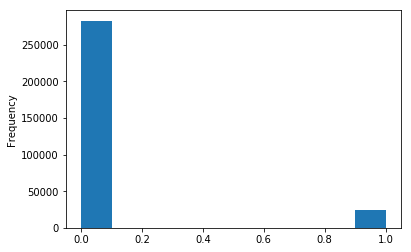

In [7]:
print(df['TARGET'].value_counts())
df['TARGET'].astype(int).plot.hist()

# Merge Data
1) Merge product purchase data to see client features who bought given product group, not individual product

- Merge following csv files
    * Product.csv
    * Master.csv 
    * Session.csv 
    * Custom.csv
    
    
- To get data below
  
  
- Client Information
    * CLNT_ID : Client ID (Primary Key)
    * CLNT_GENDER : Client Gender
    * CLNT_AGE : Client Age
    
- Purchase Information
    * SESS_DT : Session Date
    * PD_BUY_CT : Number of product purchased
    * PD_BUY_AM : Price of product purchased
    
- Product Information
    * CLAC1_NM : Product group (largest)
    * CLAC2_NM : Product group (moderate)
    * CLAC3_NM : Product group (smallest)
    
    
    
    
  